<a href="https://colab.research.google.com/github/hosseinhimself/LLM-Based-Egogram-Test/blob/main/LLM_Based_Egogram_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Requirements
! pip install -q -U langchain
! pip install -q langchain-google-genai

from langchain import PromptTemplate
from langchain.document_loaders import WebBaseLoader
from langchain.schema import StrOutputParser
from langchain.schema.prompt_template import format_document
from langchain.chains import LLMChain
from langchain_google_genai import ChatGoogleGenerativeAI

import ast
import os
import getpass
import matplotlib.pyplot as plt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.5/810.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.1/269.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 773.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 2.1 MB/s eta 0:00:00


In [36]:
# @title Set API Key
api_key = getpass.getpass('Gemini API Key:')
os.environ['GOOGLE_API_KEY'] = api_key

Gemini API Key:··········


In [28]:
# @title Prompts
initial_task_prompt = '''
  You are a psychologist and you have the duty to ask questions in order to find egogram (child, adult, parent) of the person answering the questions can be identified.
  Ask {number_of_questions} questions, where each question has an answer between numbers 1 to 5, where 1 is very low, 2 is low, 3 is average, 4 is high, and 5 is very high.
  the questions must be related to emotions, personality traits and also about emotions in hypothetical situations.
  give me the questions in this format:
  Q1:<<question text>>\nQ2:<<question text>>\n...\nQ20:<<question text>>
  just write questions and dont add any other informations
  '''

welcome = '''
  **Welcome!**
  To determine your egogram, please answer the following questions by selecting a number between 1 and 5, where:
  1 = Very low
  2 = Low
  3 = Average
  4 = High
  5 = Very high
  '''

results_prompt = '''
  You are a psychologist and your task is to determine the percentage of the user's egogram (child, adult, parent) based on the questions that have already been asked. \
  The questions are related to emotions, personality traits and also about emotions in hypothetical situations. their answers are from 1 to 5 as follows:\
  1 = Very low \
  2 = Low \
  3 = Average \
  4 = High \
  5 = Very high \
  Please disregard any questions that have not been answered or have received answers unrelated to the topic.
  The questions and their answers are given in the following format as a python dictionary:
  '<<question>>':'<<answer>>',...
  Return the answer to me exactly in the following format. ego names are string and in '' mark and numbers must be float without "%". and do not write anything else extra:
  'Child-Ego':<<result in percent>>, 'Parent-Ego':<<result in percent>>, 'Adult-Ego':<<result in percent>>


  questions and answers:

  {answers}

  '''



  **Welcome!**
  To determine your egogram, please answer the following questions by selecting a number between 1 and 5, where:
  1 = Very low
  2 = Low
  3 = Average
  4 = High
  5 = Very high
  
Q1: How often do you feel overwhelmed by your emotions? 5
Q2: Do you consider yourself to be a confident person? 4
Q3: How do you react when someone criticizes you? 3
Q4: Are you comfortable expressing your feelings to others? 2
Q5: How often do you experience feelings of guilt or shame? 3
Q6: How do you cope with stress? 4
Q7: If you were in a situation where you felt threatened, how likely would you be to stand up for yourself? 2
Q8: How often do you feel like you need to please others? 1
Q9: How well do you control your impulses? 4
Q10: If you made a mistake, how likely would you be to apologize? 3



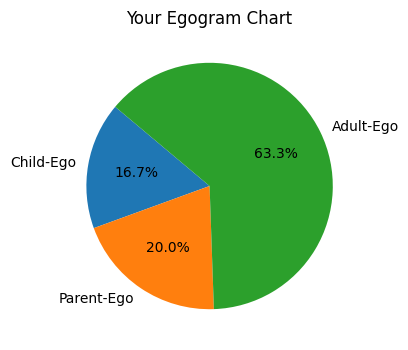

In [37]:
# @title Run the test
llm_model = ChatGoogleGenerativeAI(model="gemini-pro",
                 temperature=0.7, top_p=0.85)

def generate_questions(number_of_questions):
  prompt = PromptTemplate(input_variables=["number_of_questions"], template = initial_task_prompt)
  # define chain
  chain = LLMChain(
      llm=llm_model,
      prompt=prompt,
  )
  questions = chain.run({'number_of_questions':number_of_questions})
  return questions.split('\n')

def show_results(answers):
  res_prompt = PromptTemplate(input_variables=['answers'], template = results_prompt)
  res_chain = LLMChain(
    llm=llm_model,
    prompt=res_prompt,
  )
  return res_chain.run({'answers':answers})

def main_test():
  print(welcome)
  questions = generate_questions(10)
  answers = {}
  for q in questions:
    answers[q] = input(f'{q} ')

  print()
  result = show_results(answers)

  answers_dict = ast.literal_eval(f"{{{result}}}")

  # Extract keys (labels) and values (sizes)
  labels = list(answers_dict.keys())
  sizes = list(answers_dict.values())

  # Plotting the pie chart
  plt.figure(figsize=(4, 4))  # Define the figure size (optional)
  plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

  # Add a title
  plt.title('Your Egogram Chart')

  # Show the plot
  plt.show()

main_test()